Q1

256


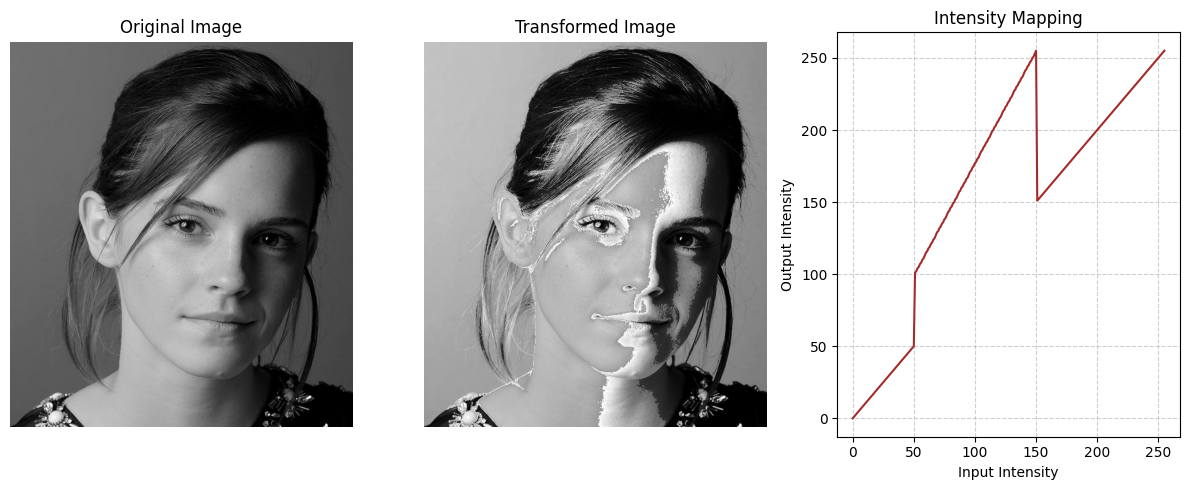

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,100),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q2



256


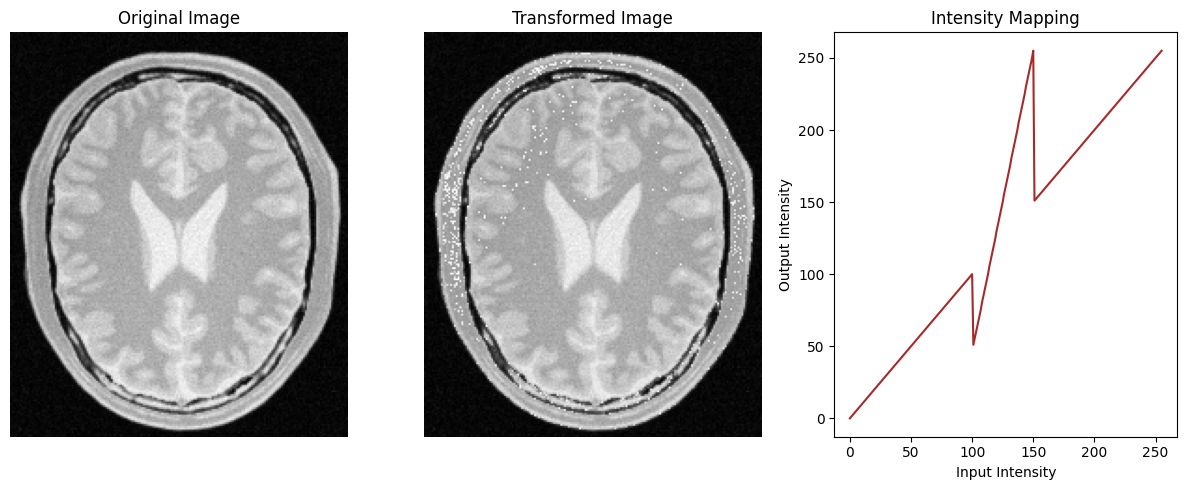

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
# transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q3

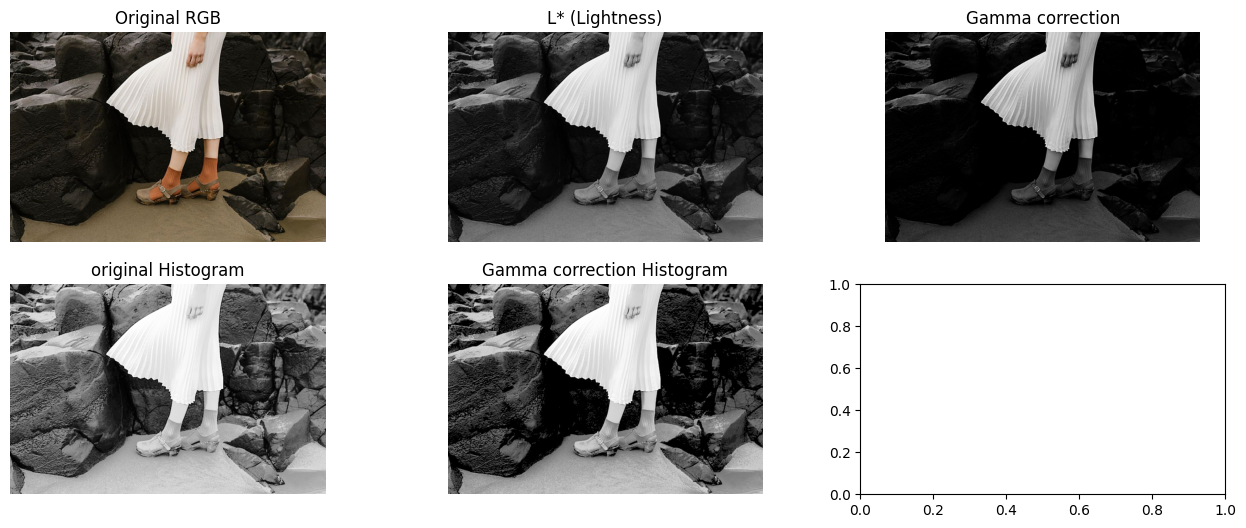

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
L, a, b = cv.split(lab)

gamma = 2
t = np.array([((i / 255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
g = t[L]

g_histo = cv.equalizeHist(g)
ori_histo = cv.equalizeHist(L)

fig, axes = plt.subplots(2, 3, figsize=(16, 6))

axes[0,0].imshow(img)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

axes[0,1].imshow(L, cmap="gray")
axes[0,1].set_title("L* (Lightness)")
axes[0,1].axis("off")

axes[0,2].imshow(g, cmap="gray")
axes[0,2].set_title("Gamma correction")
axes[0,2].axis("off")

axes[1,0].imshow(ori_histo, cmap="gray")
axes[1,0].set_title("original Histogram")
axes[1,0].axis("off")

axes[1,1].imshow(g_histo, cmap="gray")
axes[1,1].set_title("Gamma correction Histogram")
axes[1,1].axis("off")

plt.show()


Q4

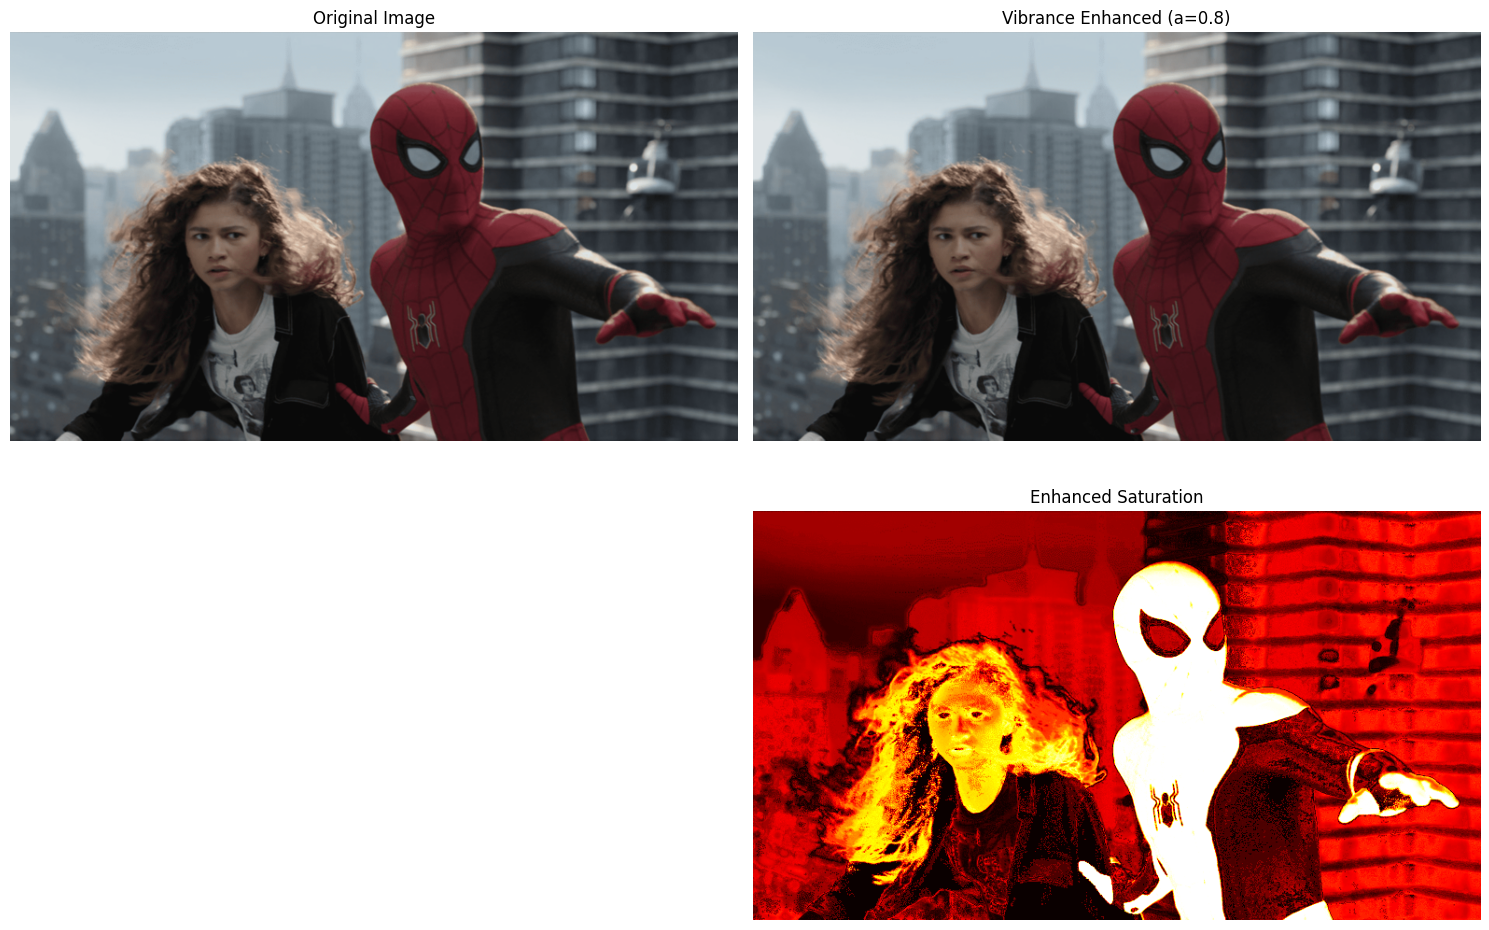

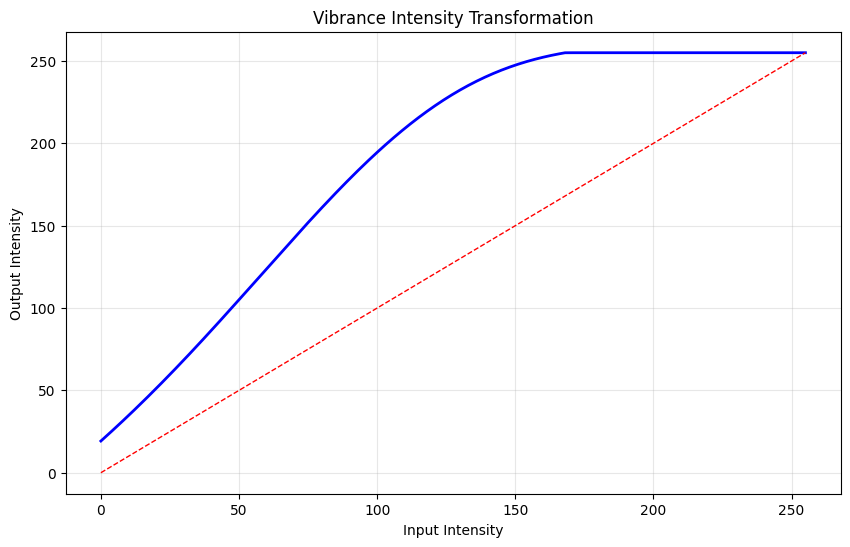

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import color
import os

img = cv2.imread("spider.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = color.rgb2hsv(img_rgb)

hue = img_hsv[:, :, 0]
saturation = img_hsv[:, :, 1]
value = img_hsv[:, :, 2]

opt_a = 0.8
sigma=70
enhanced_saturation = np.zeros_like(saturation)

for i in range(saturation.shape[0]):
    for j in range(saturation.shape[1]):
        x = saturation[i, j] * 255
        transformed = x + opt_a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
        enhanced_saturation[i, j] = min(transformed, 255) / 255

hsv_img = np.stack([hue, saturation, value], axis=2)
rgb_img = color.hsv2rgb(hsv_img)
rgb_img = (rgb_img * 255).astype(np.uint8)

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb )
plt.title('Original Image')
plt.axis('off')

# Enhanced image
plt.subplot(2, 2, 2)
plt.imshow(rgb_img)
plt.title(f'Vibrance Enhanced (a={opt_a})')
plt.axis('off')

# Saturation comparison
# plt.subplot(2, 2, 3)
# plt.imshow(saturation, cmap='hot')
# plt.title('Original Saturation')
# plt.axis('off')
# plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(enhanced_saturation, cmap='hot')
plt.title('Enhanced Saturation')
plt.axis('off')
#plt.colorbar()

plt.tight_layout()
plt.show()

x = np.linspace(0, 255, 256)
y = [min(x_val + opt_a * 128 * np.exp(-((x_val - 128) ** 2) / (2 * sigma ** 2)), 255)
    for x_val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label=f'Transformation (a={opt_a})')
plt.plot(x, x, 'r--', linewidth=1, label='Identity')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Vibrance Intensity Transformation')
plt.grid(True, alpha=0.3)
plt.show()


Q5

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
from PIL import Image

def histogram_equalization_foreground(image_path):
    img = cv2.imread("jeniffer.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # (a)
    img_hsv = color.rgb2hsv(img_rgb)
    hue = img_hsv[:, :, 0]
    saturation = img_hsv[:, :, 1]
    value = img_hsv[:, :, 2]

    # Display HSV planes
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(hue, cmap='hsv')
    plt.title('Hue Plane')
    plt.axis('off')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(saturation, cmap='gray')
    plt.title('Saturation Plane')
    plt.axis('off')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(value, cmap='gray')
    plt.title('Value Plane')
    plt.axis('off')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    # (b)
    threshold_plane = value.copy()

    threshold_plane_8bit = (threshold_plane * 255).astype(np.uint8)
    _, mask = cv2.threshold(threshold_plane_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Clean up the mask with morphological operations
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Convert mask to boolean
    mask_bool = mask.astype(bool)

    # Display the mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Foreground Mask')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # (c)
    value_8bit = (value * 255).astype(np.uint8)
    foreground_values = value_8bit[mask_bool]
    hist, bins = np.histogram(foreground_values, bins=256, range=[0, 255])

    # (d)
    cdf = np.cumsum(hist)

    # (e)
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)

    value_equalized = value_8bit.copy()
    value_equalized[mask_bool] = cdf_normalized[value_8bit[mask_bool]]

    # Convert back to 0-1 range for HSV
    value_equalized_normalized = value_equalized.astype(np.float32) / 255.0

    # (f) Extract background and combine with equalized foreground
    # Create new HSV image with equalized foreground
    hsv_equalized = img_hsv.copy()
    hsv_equalized[:, :, 2] = value_equalized_normalized

    # Convert back to RGB
    result_rgb = color.hsv2rgb(hsv_equalized)
    result_rgb = (result_rgb * 255).astype(np.uint8)

    # Display final results
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Mask
    plt.subplot(2, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Foreground Mask')
    plt.axis('off')

    # Original value plane
    plt.subplot(2, 3, 3)
    plt.imshow(value, cmap='gray')
    plt.title('Original Value Plane')
    plt.axis('off')

    # Equalized value plane
    plt.subplot(2, 3, 4)
    plt.imshow(value_equalized_normalized, cmap='gray')
    plt.title('Equalized Value Plane')
    plt.axis('off')

    # Final result
    plt.subplot(2, 3, 5)
    plt.imshow(result_rgb)
    plt.title('Result: Foreground Equalized')
    plt.axis('off')

    # Histogram comparison
    plt.subplot(2, 3, 6)
    plt.plot(hist, label='Original Foreground', alpha=0.7)
    hist_equalized, _ = np.histogram(value_equalized[mask_bool], bins=256, range=[0, 255])
    plt.plot(hist_equalized, label='Equalized Foreground', alpha=0.7)
    plt.title('Histogram Comparison')
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


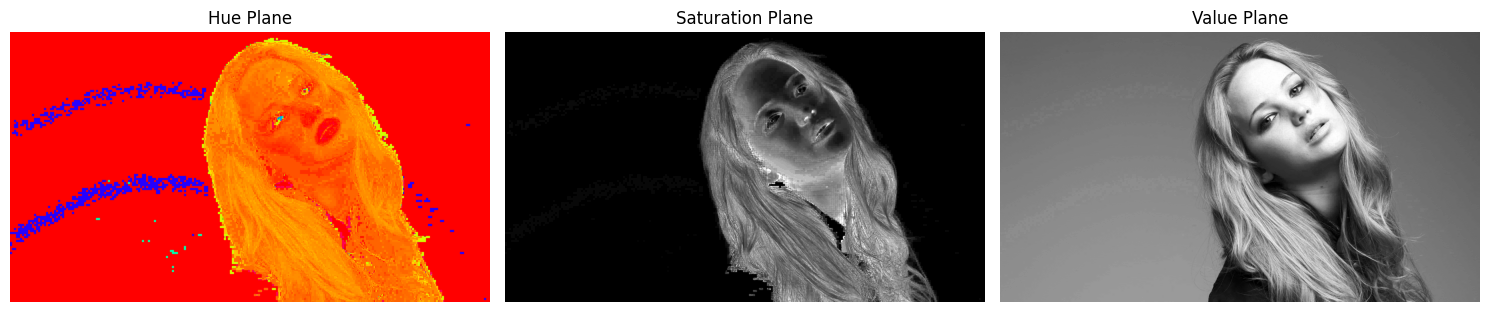

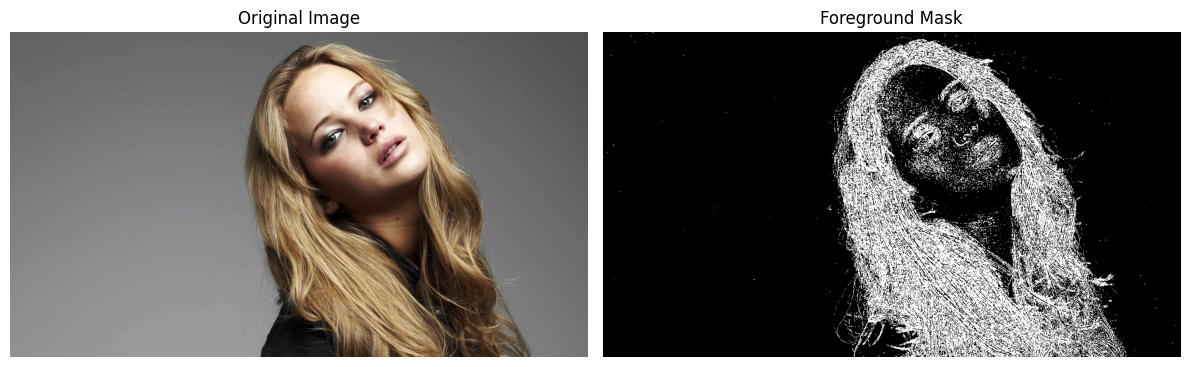

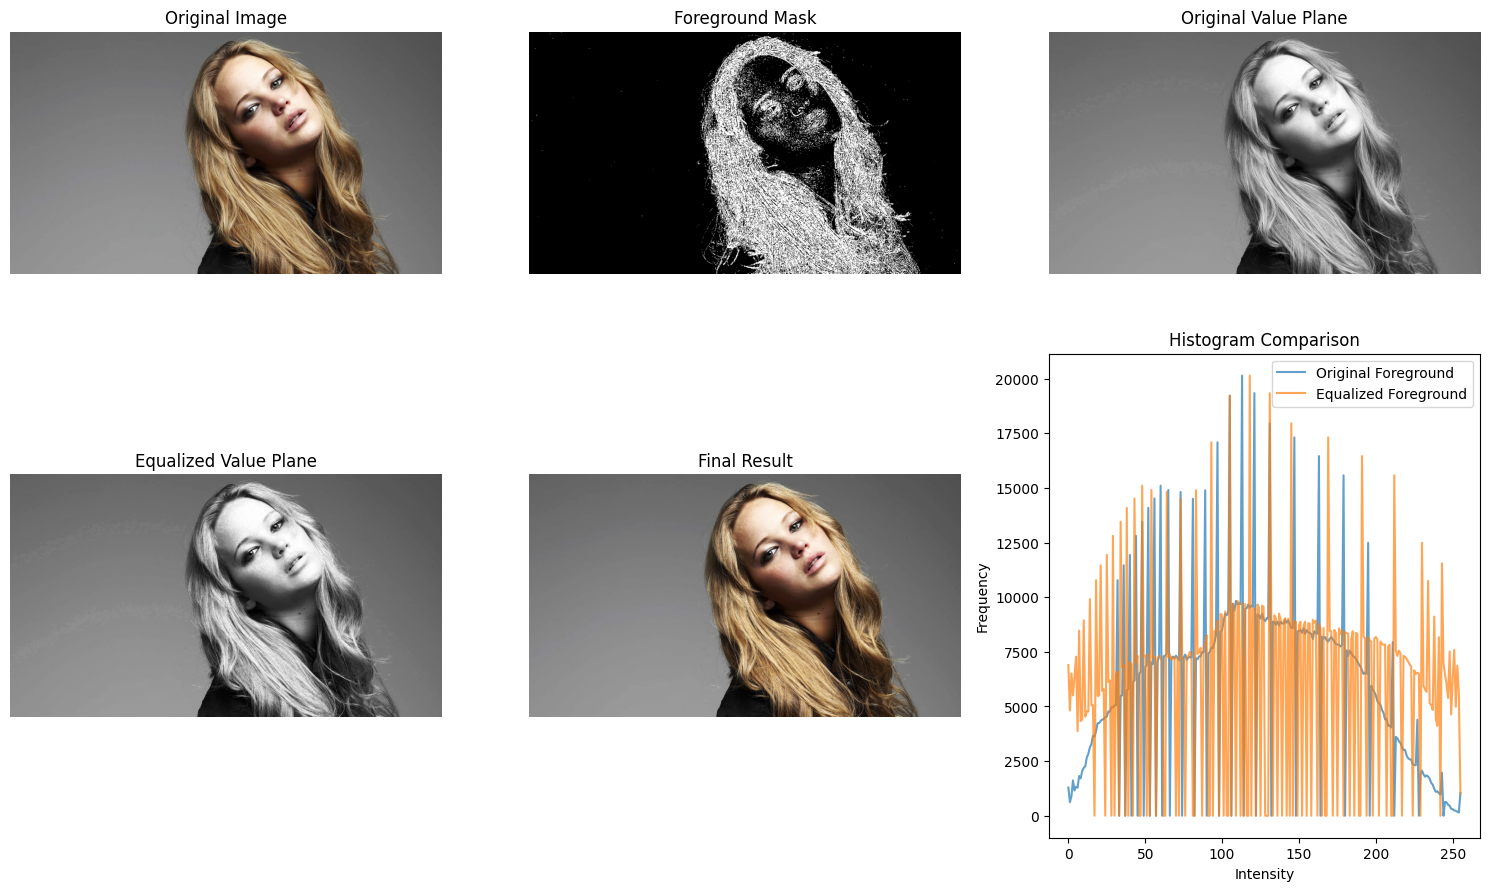

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
from skimage import data
from scipy import ndimage

image = np.array(Image.open('jeniffer.jpg'))
# Convert to RGB
if len(image.shape) == 3 and image.shape[2] == 3:
    img_rgb = image
else:
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (a)
img_hsv = color.rgb2hsv(img_rgb)
hue = img_hsv[:, :, 0]
saturation = img_hsv[:, :, 1]
value = img_hsv[:, :, 2]

# Display HSV planes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(hue, cmap='hsv')
axes[0].set_title('Hue Plane')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Plane')
axes[1].axis('off')

axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Plane')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# (b)
val_8bit = (value * 255).astype(np.uint8)

mask = cv2.adaptiveThreshold(val_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

if np.mean(mask) > 127:
    mask = cv2.bitwise_not(mask)

kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

mask_bool = mask > 0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Foreground Mask')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# (c)
foreground_values = val_8bit[mask_bool]

if len(foreground_values) == 0:
    foreground_values = val_8bit.flatten()
    mask_bool = np.ones_like(val_8bit, dtype=bool)

hist, bins = np.histogram(foreground_values, bins=256, range=[0, 255])

# (d)
cdf = np.cumsum(hist)

# (e)
cdf_min = cdf.min()
cdf_max = cdf.max()

if cdf_max - cdf_min > 0:
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
else:
    cdf_normalized = cdf * 0  # All zeros if no variation

cdf_normalized = cdf_normalized.astype(np.uint8)

value_equalized = val_8bit.copy()
value_equalized[mask_bool] = cdf_normalized[val_8bit[mask_bool]]

value_equalized_normalized = value_equalized.astype(np.float32) / 255.0

# (f)
hsv_equalized = img_hsv.copy()
hsv_equalized[:, :, 2] = value_equalized_normalized
result_rgb = color.hsv2rgb(hsv_equalized)
result_rgb = (result_rgb * 255).astype(np.uint8)

# Display final results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(mask, cmap='gray')
axes[0, 1].set_title('Foreground Mask')
axes[0, 1].axis('off')

axes[0, 2].imshow(value, cmap='gray')
axes[0, 2].set_title('Original Value Plane')
axes[0, 2].axis('off')

# Row 2
axes[1, 0].imshow(value_equalized_normalized, cmap='gray')
axes[1, 0].set_title('Equalized Value Plane')
axes[1, 0].axis('off')

axes[1, 1].imshow(result_rgb)
axes[1, 1].set_title('Final Result')
axes[1, 1].axis('off')

# Histogram comparison
axes[1, 2].plot(hist, label='Original Foreground', alpha=0.7)
hist_equalized, _ = np.histogram(value_equalized[mask_bool], bins=256, range=[0, 255])
axes[1, 2].plot(hist_equalized, label='Equalized Foreground', alpha=0.7)
axes[1, 2].set_title('Histogram Comparison')
axes[1, 2].legend()
axes[1, 2].set_xlabel('Intensity')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

    #return img_rgb, mask, result_rgb, hue, saturation, value

# your_image = np.array(Image.open('jeniffer.jpg'))
# original, mask, result, hue, sat, val = histogram_equalization_foreground(your_image)